In [1]:
from agents import ConsumerProducer, Influencer, ImperfectConsumerProducer
from content_market import ContentMarket
import numpy as np
from stats import TestStats

In [2]:
num_influencers = 1
num_consumer_producers = 10

production_rate = 1
external_production_rate = 1

topics = [[-1, 1]]
topics = np.array(topics)

In [3]:
content_market = ContentMarket(topics, production_rate, external_production_rate)

In [4]:
from util import exponential_decay, inverse_decay, tanh_decay

In [5]:
agent_colors = dict()

for i in range(num_consumer_producers):
    cons_func = lambda x: inverse_decay(x, 1, 2)
    prod_func = lambda x: inverse_decay(x, 1, 2)
    consumer_producer = ConsumerProducer(prod_func, cons_func, 10, 15, 1, init_following_rates_method='equal')
    #consumer_producer = ImperfectConsumerProducer(prod_func, cons_func, 10, 3, 1, init_following_rates_method='equal')
    content_market.add_agent(consumer_producer)

    color = np.random.rand(3,)
    agent_colors[consumer_producer.index] = color

for i in range(num_influencers):
    influencer = Influencer(20, 1, init_following_rates_method='equal')
    content_market.add_agent(influencer)

    color = np.random.rand(3,)
    agent_colors[influencer.index] = color

In [6]:
import matplotlib.pyplot as plt
import visualize

In [7]:
content_market.finalize(method='even')

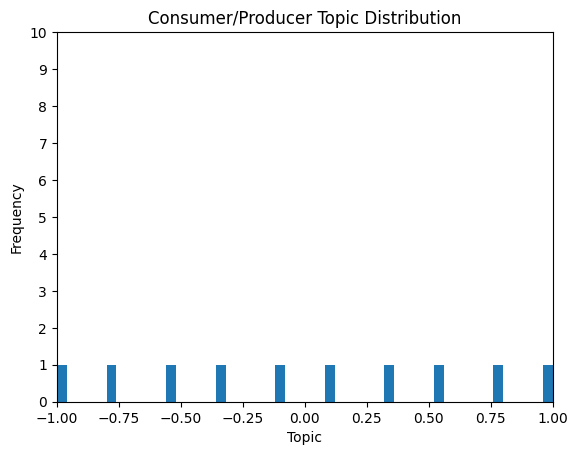

In [8]:
visualize.plot_topic_distribution_histogram("Consumer/Producer Topic Distribution", content_market.consumers, -1, 1)

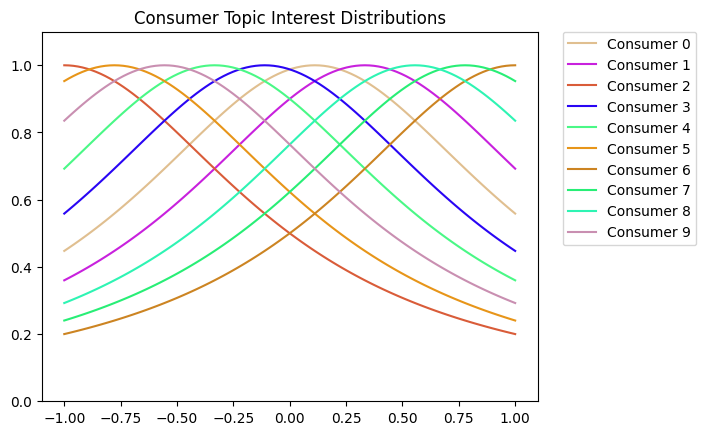

In [9]:
visualize.plot_consumer_topic_interest_distributions("Consumer Topic Interest Distributions", content_market.consumers, -1, 1, agent_colors)

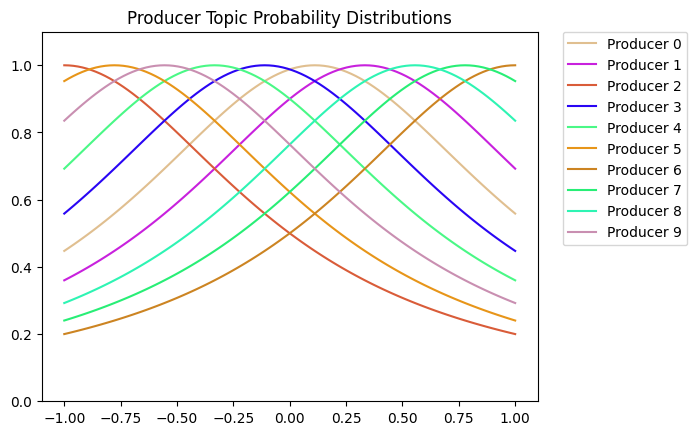

In [10]:
visualize.plot_producer_topic_probability_distributions("Producer Topic Probability Distributions", content_market.producers, -1, 1, agent_colors)

In [11]:
stats: TestStats = content_market.optimize(100)

Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing influencer 10
Optimizing producer 0
Optimizing producer 1
Optimizing producer 2
Optimizing producer 3
Optimizing producer 4
Optimizing producer 5
Optimizing producer 6
Optimizing producer 7
Optimizing producer 8
Optimizing producer 9
Iteration 0 / 100 done.
Total Social Welfare: 210.27190732191386
Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing influencer 10
Optimizing producer 0
Optimizing producer 1
Optimizing producer 2
Optimizing producer 3
Optimizing producer 4
Optimizing producer 5
Optimizing producer 6
Optimizing producer 7
Optimizing producer 8
Optimizing producer 9
Itera

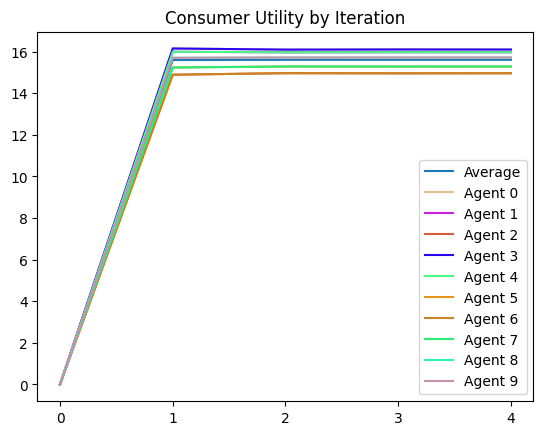

In [12]:
visualize.plot_agent_utility_by_iteration("Consumer Utility by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_utility)

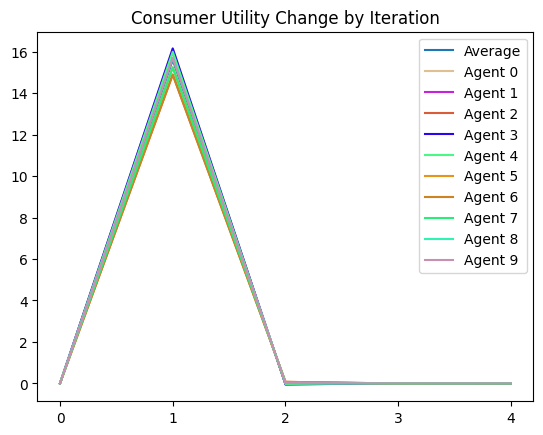

In [13]:
visualize.plot_agent_utility_change_by_iteration("Consumer Utility Change by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_utility_change)

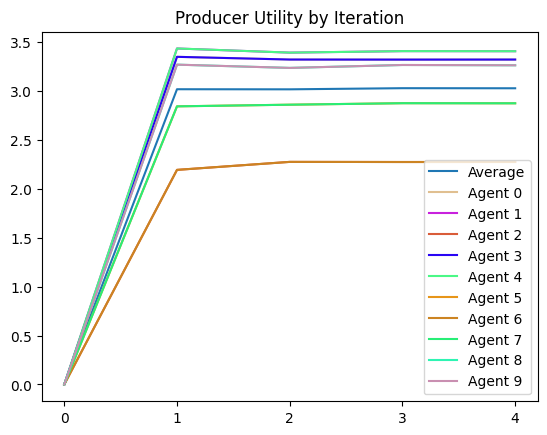

In [14]:
visualize.plot_agent_utility_by_iteration("Producer Utility by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_utility)

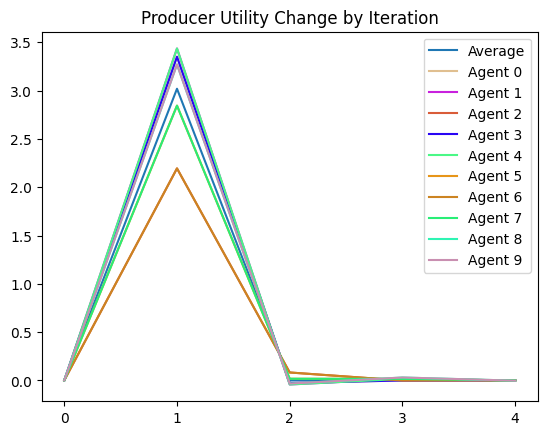

In [15]:
visualize.plot_agent_utility_change_by_iteration("Producer Utility Change by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_utility_change)

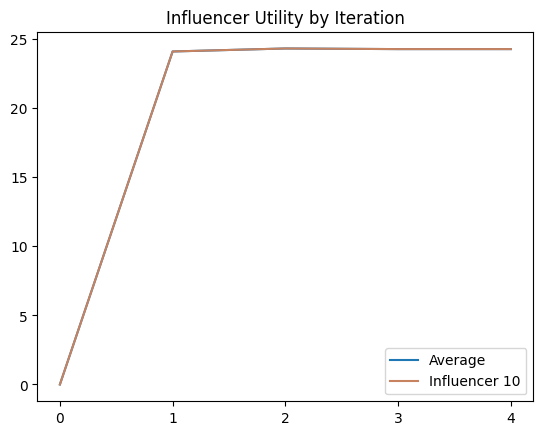

In [16]:
visualize.plot_agent_utility_by_iteration("Influencer Utility by Iteration", content_market.influencers, agent_colors, stats.influencer_stats, stats.average_influencer_utility)

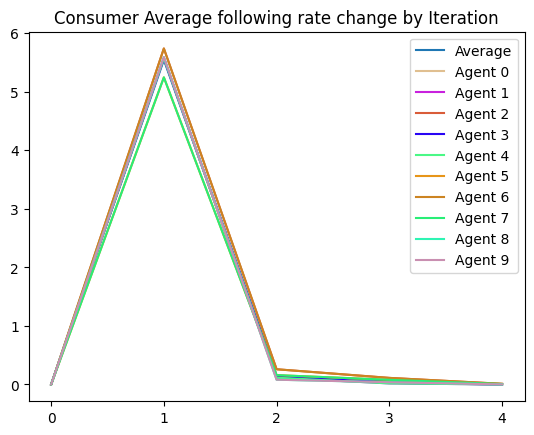

In [17]:
visualize.plot_following_rate_change_by_iteration("Consumer Average following rate change by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_rate_change)

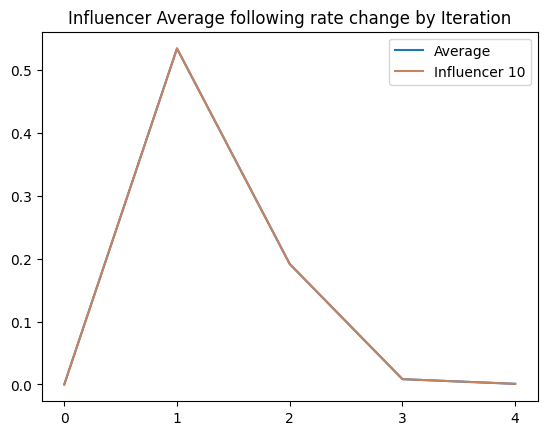

In [18]:
visualize.plot_following_rate_change_by_iteration("Influencer Average following rate change by Iteration", content_market.influencers, agent_colors, stats.influencer_stats, stats.average_influencer_rate_change)

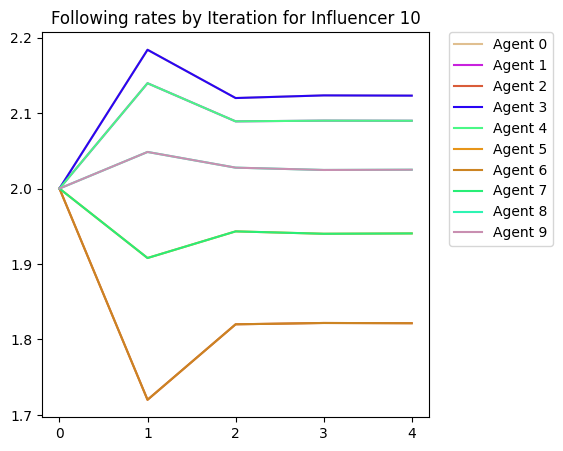

In [19]:
visualize.plot_following_rates_by_iteration(content_market.influencers, content_market.producers, agent_colors, stats.influencer_stats)

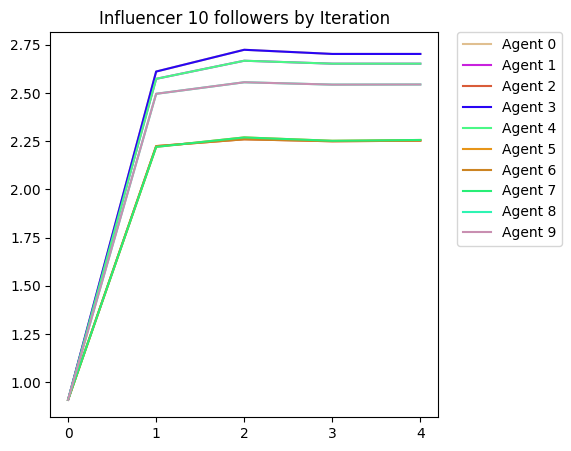

In [20]:
visualize.plot_follows_by_iteration(content_market.influencers, content_market.consumers, agent_colors, stats.consumer_stats)

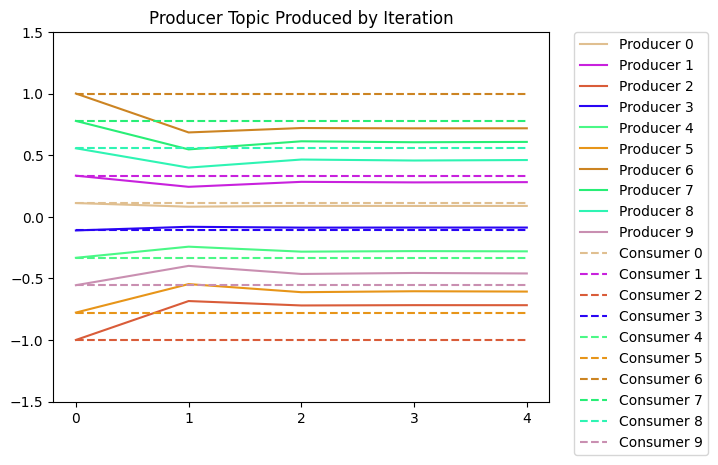

In [21]:
visualize.plot_producer_topic_produced_by_iteration("Producer Topic Produced by Iteration", content_market.producers, content_market.consumers, agent_colors, stats.producer_stats)

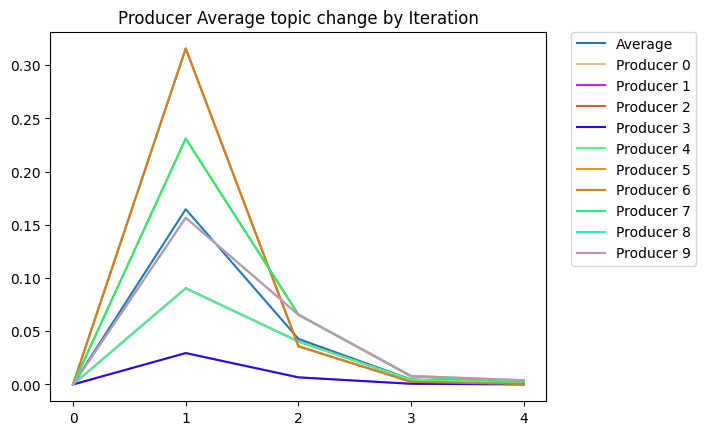

In [22]:
visualize.plot_producer_topic_change_by_iteration("Producer Average topic change by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_topic_change)

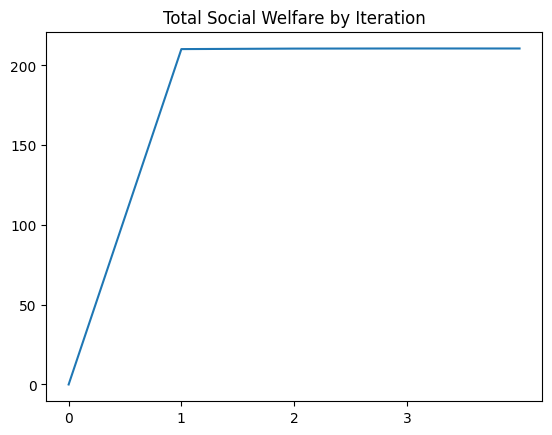

In [23]:
visualize.plot_total_social_welfare_by_iteration("Total Social Welfare by Iteration", stats)

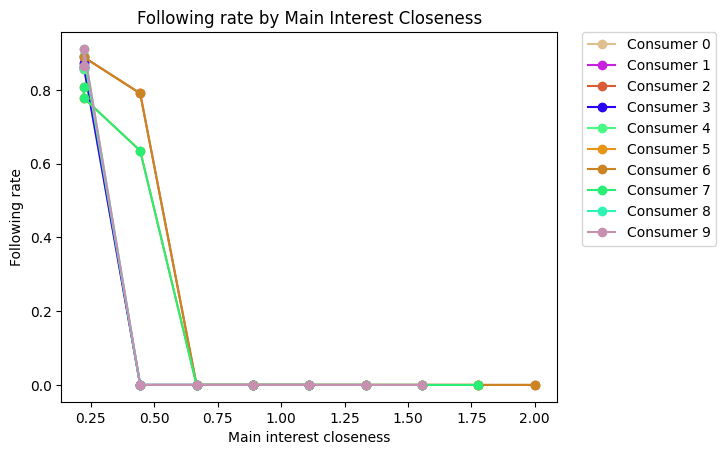

In [24]:
visualize.plot_following_rate_by_main_interest_closeness("Following rate by Main Interest Closeness", content_market.consumers, content_market.producers, agent_colors, stats.consumer_stats)

In [ ]:
visualize.plot_producer_topic_distance_from_main_interest_by_iteration("Producer topic distance from main interest by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_topic_distance_from_main_interest)

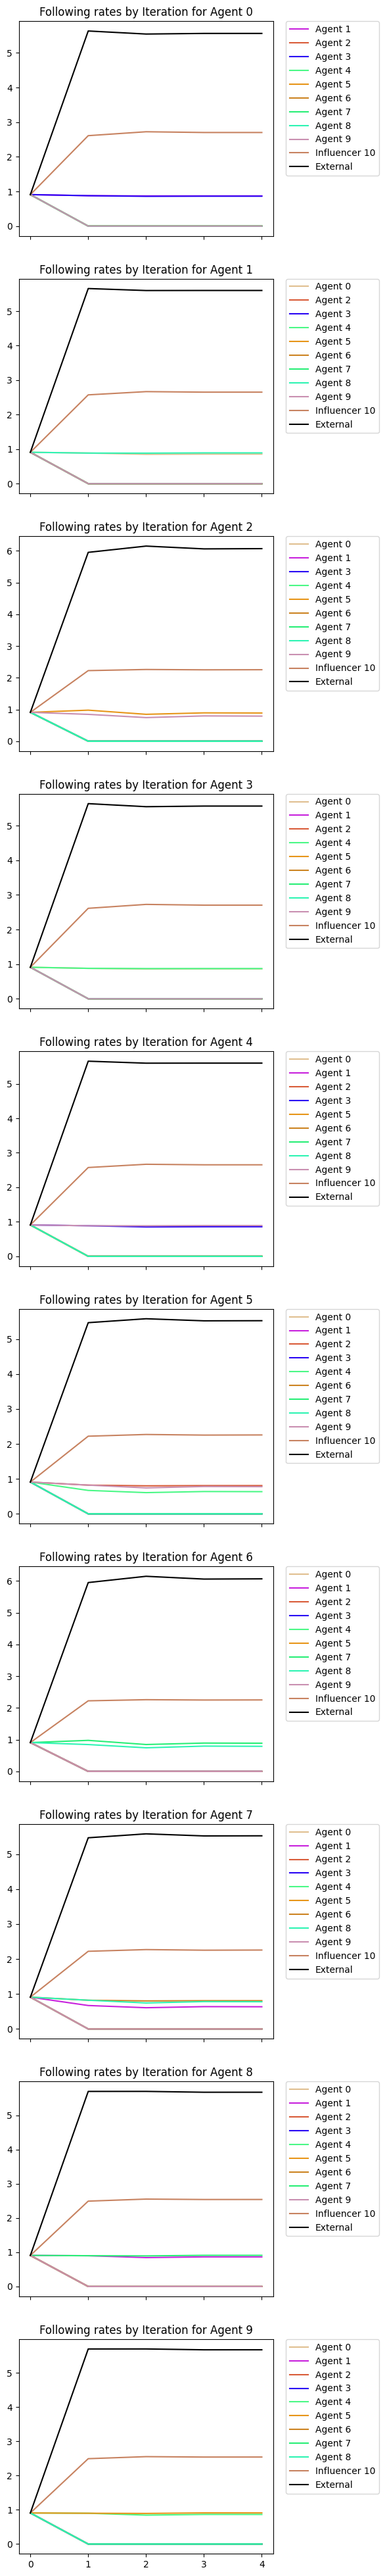

In [25]:
visualize.plot_following_rates_by_iteration(content_market.consumers, sorted(list(set(content_market.producers + content_market.influencers)), key=lambda x: x.index), agent_colors, stats.consumer_stats)

In [26]:
stats.__dict__

{'market': <content_market.ContentMarket at 0x129fc21a0>,
 'finished': True,
 'num_iterations': 4,
 'total_consumer_utility': [0,
  155.97218591757263,
  156.07608286906708,
  156.08071911653641,
  156.08094393582508],
 'total_producer_utility': [0,
  30.195133491027516,
  30.18548290463689,
  30.302111591816544,
  30.293936523831743],
 'total_influencer_utility': [0,
  24.10458791331371,
  24.321855372920044,
  24.27661403431164,
  24.276777202517113],
 'total_social_welfare': [0,
  210.27190732191386,
  210.58342114662403,
  210.65944474266462,
  210.65165766217393],
 'average_consumer_rate_change': [0,
  5.544325066101326,
  0.15222033806679006,
  0.05534193635270893,
  0.0040293391076525135],
 'average_producer_topic_change': [0,
  0.1646772226866508,
  0.04281143717919499,
  0.004639626763384225,
  0.0018061918196612848],
 'average_influencer_rate_change': [0,
  0.5337563663829396,
  0.19141095756119256,
  0.008447850165136639,
  0.001027996001135972],
 'average_consumer_utility_c